#**Milestone 2: New Orleans Rental Data**

**Olivia Meyer and Sydney Wade**

https://github.com/sydneywade/sydneywade.github.io/blob/main/Milestone%202%20Data%20Science.html


### Focused Discussion

The team will be researching the question of which variables are predictive for the location of a short-term rental property using the latitude and longitude of current short-term rental properties in New Orleans. The team will also be exploring  which variables are predictive of the size and guest capacity of a short-term rental property. This will include the use of datasets that contain variables such as the locations of grocery stores and alcoholic beverage stores. The data sets the team will be using are relevant because they map the latitude and longitudes of variables that may predict the location of short term rental properties, which will be used in the predictive models.



### Model Plan
1. The team plans to use the latitude and longitude variable of a short-term rental property to predict whether a grocery store is likely to be within a half a mile of the short-term rental property
2. The team plans to use the latitude and longitude of both grocery stores and bars to predict if a short-term rental property is likely to be in a designated area by training the data, setting the variables to "true" in a new series, and using k-nearest neighbor predictor.


###Collaboration Plan
Our collaboration plan is to meet every Tuesday at 3:15 after class. We will be using a shared Google Colab to work on our code together, as well as a Github repository for this project. From now until April 12th, we will be performing exploratory data analysis to build models from the data for Milestone 2 of the project. During these weeks, we will document our progress to prepare for the deliverables.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np


##Table 1

The first table is from the City of New Orleans Open Data (data.nola.gov). This data set includes information about permit requests for short-term rental properties in New Orleans, the permit’s property status, and the status of the permit request. The team chose this data set because it includes variables of approved permits, such as permit type, residential subtype, property location, and status of the request. Each of these variables will be relevant in answering the research question by providing insight of what elements are predictive of a short term rental permit application and subsequent approval.



In [ ]:
import matplotlib.pyplot as plt


df = pd.read_csv('Short-Term_Rental_Permit_Applications_20240307.csv')
df = df.dropna(subset = ["Address"])
df = df.drop_duplicates( subset = ["Address"],  keep='first')
df = df.drop(['Permit Number', 'Expired', "Expiration Date", "Bedroom Limit", "Guest Occupancy Limit"], axis=1)
df = df.drop(['Link', 'Operator Name', "Operator Phone", "Operator Email", "Operator Permit Number", "Reference Code"], axis=1)
#Dropped colums such as permit number and housing information such as bedroom limit and guest occupancy limit as the following data set has
#more exhaustive information regarding these characateritics


df["Permit Type"].value_counts()



Permit Type
Short Term Rental                      5514
Short Term Rental Residential Owner     117
Interim STR                              37
Short Term Rental Commercial Owner       34
o                                         1
Cut Flowers                               1
Name: count, dtype: int64

###Most Common Rentals
Short Term Rental is the most common type of permit
Short Term Rental Residential Owner and Commerical Owner are second and third

This dataset includes information about rejected or expired permits, operator information and duplicate variables. The team will be analyzing data about approved short-term rental properties being used for vacation purposes, so these variables are dropped from the dataset.


## Table 2
The first table is from the City of New Orleans Open Data (data.nola.gov). This data set includes information about short term vacation rental properties in New Orleans. This data set provides insight on factors such as guest limit, bedroom limit, location, and whether the owner is commercial or residential.  The team chose this data set to merge with table 1 on Address to gain more data and insight on the characteristics of properties that are being rented for vacation use in New Orleans.

,Address,Bedroom limit,Guest limit,Location
0,4444 S Galvez St,1.0,2.0,"(29.9443943986815, -90.1050029665776)"
1,431 Pelican Ave,3.0,6.0,"(29.9528011358107, -90.0515659776536)"
2,5601 Charlotte Dr,5.0,10.0,"(30.0148005628673, -90.0717193366645)"
3,2507 Bell St,3.0,6.0,"(29.9761377084348, -90.0770016778175)"
4,1525 PRYTANIA ST,NaN,NaN,"(29.9382381387242, -90.0747519816312)"
...,...,...,...,...
1189,606 Iberville St Apt 3A,2.0,4.0,"(29.9535376984007, -90.0676685080303)"
1190,512 S Salcedo St,3.0,4.0,"(29.9643962123194, -90.0946177025817)"
1191,822 Baronne St Apt 202,3.0,6.0,"(29.9459488067063, -90.0741578172454)"
1192,2919 Gravier St Unit 101,1.0,2.0,"(29.9622597361717, -90.0947245415022)"


Text(0, 0.5, 'Frequency')

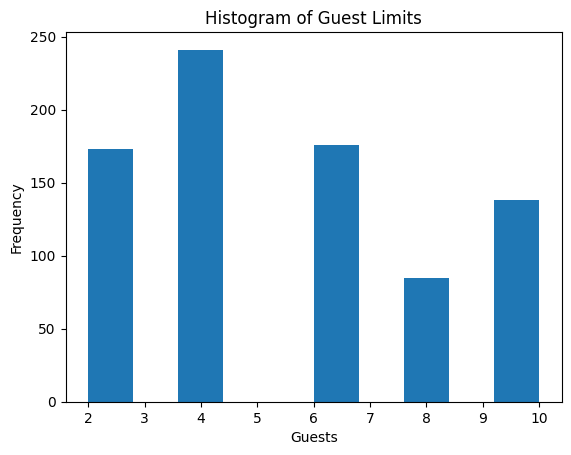

In [ ]:
import matplotlib.pyplot as plt

df_vacation = pd.read_csv('Vacation_Rentals__Hotels__B_B__short-term_rentals__etc.__20240307.csv')
df_vacation = df_vacation.drop(["Name", "Type", "x", "y", "Expiration date"], axis=1)
display(df_vacation)
plt.hist(df_vacation["Guest limit"])
plt.title('Histogram of Guest Limits')
plt.xlabel('Guests')
plt.ylabel('Frequency')


In [ ]:
import matplotlib.pyplot as plt

df_merge = df.merge(df_vacation, left_on="Address", right_on="Address", how='inner')
# display(df_merge)
# df_merge["Location1"] =
df_merge["Latitude"] = 0
df_merge["Longitude"] = 0
# df_merge[["Latitude", "Longitude"]] = pd.DataFrame(df_merge['Location_x'].tolist(), index=df_merge.index)
df_merge[["Latitude", "Longitude"]] = df_merge["Location_x"].str.split(',', expand=True)
df_merge["Latitude"] = df_merge["Latitude"].apply(lambda x: x.replace('(', ''))
df_merge["Longitude"] = df_merge["Longitude"].apply(lambda x: x.replace(')', ''))
df_merge["Longitude"].dtype
# str.replace(('(', ''))
# # df_merge["Longitude"].str.replace((')', ''))
df_merge["Longitude"]= df_merge["Longitude"].astype(float)
df_merge["Latitude"]= df_merge["Latitude"].astype(float)
display(df)
display(df_vacation)



,Address,Permit Type,Residential Subtype,Current Status,License Holder Name,Application Date,Issue_Date,X,Y,Location
1,2235 S Carrollton Ave,Short Term Rental,NaN,Duplicate,Joel W Roberts,11/03/2017,NaN,3.664667e+06,531074.94000,"(29.954772257164215, -90.12123689791639)"
3,888 Girod St Apt 201,Short Term Rental Residential Owner,NaN,Withdrawn,700 Baronne Street LLC,04/13/2021,NaN,3.679783e+06,528694.20000,"(29.9477777103789, -90.07359090767176)"
4,216 Chartres ST,Short Term Rental,Temporary STR,Denied,Karen Hanchey,04/10/2017,NaN,3.681842e+06,530887.53594,"(29.953746218012867, -90.06701104024313)"
5,930 Nashville Ave,Short Term Rental,Accessory STR,Denied,Benjamin Hatfield,04/12/2017,NaN,3.665575e+06,519548.13222,"(29.923050796241498, -90.11875729902609)"
6,1428 Joliet ST Apt B,Short Term Rental,Temporary STR,Denied,Claudia Moniz,04/22/2017,NaN,3.661505e+06,530058.02867,"(29.95206767635065, -90.13125554996512)"
...,...,...,...,...,...,...,...,...,...,...
7040,Decatur ST,Short Term Rental,Temporary STR,Denied,Jay Rodney,09/17/2017,NaN,-1.000000e+00,-1.00000,"(28.098890706026218, -101.51779913517808)"
7041,1418 Chartres Unit C,Short Term Rental,Temporary STR,Pending,Gordon Hatchett,07/07/2017,NaN,3.684519e+06,534304.71610,"(29.963060681870047, -90.05843910173057)"
7042,707 7TH,Short Term Rental,Accessory STR,Expired,Bethany Fields,04/12/2017,05/03/2017,3.677182e+06,519199.44351,"(29.92174861584439, -90.0821308586087)"
7046,607 S Pierce ST,Short Term Rental,Temporary STR,Expired,Matthew Kern,02/01/2018,02/21/2018,3.670203e+06,536430.68000,"(29.969336591927277, -90.10357626826418)"


,Address,Bedroom limit,Guest limit,Location
0,4444 S Galvez St,1.0,2.0,"(29.9443943986815, -90.1050029665776)"
1,431 Pelican Ave,3.0,6.0,"(29.9528011358107, -90.0515659776536)"
2,5601 Charlotte Dr,5.0,10.0,"(30.0148005628673, -90.0717193366645)"
3,2507 Bell St,3.0,6.0,"(29.9761377084348, -90.0770016778175)"
4,1525 PRYTANIA ST,NaN,NaN,"(29.9382381387242, -90.0747519816312)"
...,...,...,...,...
1189,606 Iberville St Apt 3A,2.0,4.0,"(29.9535376984007, -90.0676685080303)"
1190,512 S Salcedo St,3.0,4.0,"(29.9643962123194, -90.0946177025817)"
1191,822 Baronne St Apt 202,3.0,6.0,"(29.9459488067063, -90.0741578172454)"
1192,2919 Gravier St Unit 101,1.0,2.0,"(29.9622597361717, -90.0947245415022)"


In [ ]:
avbed = df_merge["Bedroom limit"].mean()
print("The Average Amount of bedrooms in a rental property: ", avbed)
avguest = df_merge["Guest limit"].mean()
print("The Average Amount of Guests allowed in a rental property: ", avguest)

maxbed = df_merge["Bedroom limit"].max()
maxguest = df_merge["Guest limit"].max()
print("The largest house holds", maxguest, "guests and has", maxbed, "bedrooms")


The Average Amount of bedrooms in a rental property:  2.3640776699029127
The Average Amount of Guests allowed in a rental property:  4.728155339805825
The largest house holds 10.0 guests and has 5.0 bedrooms


### Summary Statistics
The Average Amount of bedrooms in a rental property:  2.72

The Average Amount of Guests allowed in a rental property:  5.44

The largest house holds 10.0 guests and has  5.0 bedrooms


Mean Longitude: -90.07404437892556
Mean Latitude: 29.95226620084603
Standard Deviation of Latitude: 0.01549431700672095
Standard Deviation of Longitude: 0.0196966605757362


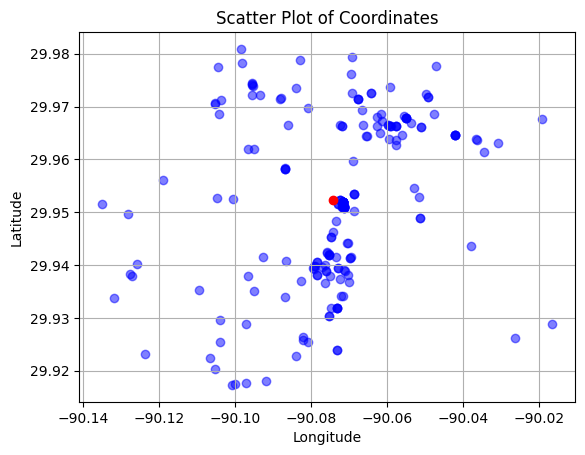

In [ ]:

mean_lon = df_merge.Longitude.mean()
print("Mean Longitude:", mean_lon)
mean_lat = df_merge.Latitude.mean()
print("Mean Latitude:", mean_lat)
std_lat = df_merge.Latitude.std()
print("Standard Deviation of Latitude:", std_lat)
std_lon = df_merge.Longitude.std()
print("Standard Deviation of Longitude:", std_lon)


fig = plt.scatter(df_merge['Longitude'], df_merge['Latitude'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.scatter(mean_lon,mean_lat, color = "red")
# plt.plot(mean_lat,mean_lon)
plt.show()

###Scatter Plot
To determine where the most common areas are for rental properties we have graphed the longitude and latitudes of all the properties on the graph above.   
###Summary Statistics
Mean Longitude: -90.0724378770686

Mean Latitude: 29.956069043236788

Standard Deviation of Latitude: 0.025543364571551423

Standard Deviation of Longitude: 0.038847863375857536

,the_geom,OBJECTID,Business Name,Address,Suite,Zip,Phone Number,Latitude,Longitude
0,POINT (-90.010462442348 30.011375732797),62,CHEF FUEL LLC,6711 CHEF MENTEUR HWY,NaN,70126,NaN,29.933805,-90.131708
1,POINT (-89.999912773961 29.911395962499),1,A & J'S MART,5163 GENERAL DE GAULLE DR,NaN,70131,504-394-4410,29.952229,-90.072236
2,POINT (-90.082568661226 29.942860681516),212,PROJECT FOOD STORE #2,2238 MARTIN LUTHER KING JR BLVD,NaN,70113,504-586-1762,29.966833,-90.053567
3,POINT (-89.818452798836 30.070799135257),26,BIG BOY DISTRIBUTORS,4441 SAN GIORGIO ST,NaN,70129,504-628-5689,29.926084,-90.026246
4,POINT (-90.076989294557 29.951922709288),53,CANSECO'S CARROLLTON MARKET,1133 S CARROLLTON AVE AVE,NaN,70118,NaN,29.942371,-90.075821
...,...,...,...,...,...,...,...,...,...
305,POINT (-90.07722986226 29.96725599215),50,CAJUN WILLS,2127 ORLEANS AVE,NaN,70116,504-821-6386,NaN,NaN
306,POINT (-90.058418996107 29.961028678935),11,ALTALIEH CONVENIENCE,87 FRENCH MARKET PL,NaN,70116,504-339-8438,NaN,NaN
307,POINT (-90.100097872802 29.921048906742),15,AVENUE MART LLC,4237 MAGAZINE ST,NaN,70115,(504899-8579,NaN,NaN
308,POINT (-90.116208668355 29.950540239962),34,BROADWAY FOOD STORE,2223 BROADWAY ST,NaN,70118-5409,504-861-0505,NaN,NaN


Text(0.5, 1.0, 'Scatter Plot of Grocery Stores')

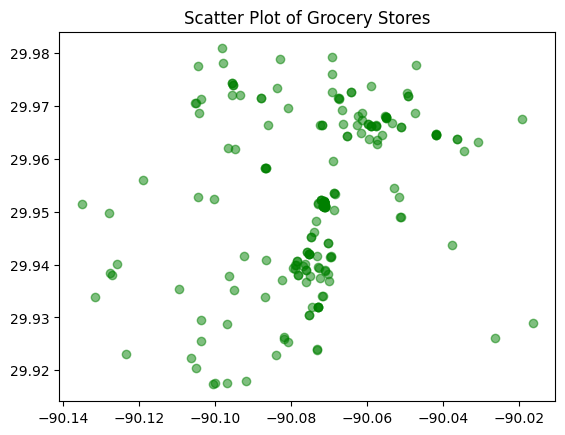

In [ ]:
grocery_df = pd.read_csv('Grocery_Stores_20240403.csv')
# display(grocery_df)

grocery_df["Latitude"] = 0
grocery_df["Longitude"] = 0
grocery_df["Latitude"] = grocery_df.the_geom.str[7:23]
grocery_df["Longitude"] = grocery_df.the_geom.str[24:39]

grocery_df["Longitude"]= df_merge["Longitude"].astype(float)
grocery_df["Latitude"]= df_merge["Latitude"].astype(float)
display(grocery_df)

plt.scatter(grocery_df['Longitude'], grocery_df['Latitude'], color='green', alpha=0.5)
plt.title('Scatter Plot of Grocery Stores')


###Graph of Grocery Stores in New Orleans

Text(0.5, 1.0, 'Scatter Plot of Grocery Stores and Rental Properties')

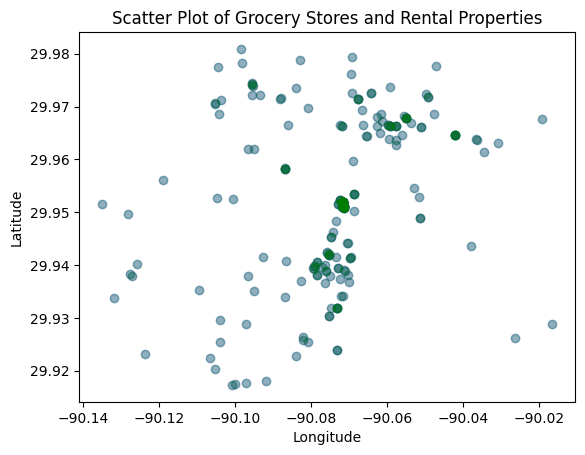

In [ ]:
import pylab
fig, ax = plt.subplots()
ax.scatter(df_merge['Longitude'], df_merge['Latitude'], color='blue', alpha=0.25)
ax.scatter(grocery_df['Longitude'], grocery_df['Latitude'], color='green', alpha=0.25)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Scatter Plot of Grocery Stores and Rental Properties')


Plan:
Make a column that shows whether or not a grocery store is within half mile or some other measurement of a rental
Use KNN or a classification algrotihm to determine whether or not a different rental property would be likely to ahve a grocery store close by

,the_geom,OBJECTID,OwnerName,BusinessName,Address,Suite,City,State,Zip,BusinessType,Lat,Lon
0,POINT (-90.04288040507 29.962397316802),7,2309 Jeff LLC dba Pizza Delicious,2309 Jeff LLC dba Pizza Delicious,617 Piety St,NaN,New Orleans,LA,70117.0,1105 - Full Service Restaurants (table service...,29.962392,-90.042875
1,POINT (-90.065096811452 29.982223420835),353,Hammad Saed,Cousin's Foodmart Inc dba Brooks Grocery,2434 Allen St,NaN,New Orleans,LA,70119.0,1106 - Supermarket & Other Grocery (except Con...,29.982218,-90.065091
2,POINT (-90.055055608292 29.963771117085),6,2301 Chartres LLC dba Friendly Bar,2301 Chartres LLC dba Friendly Bar,2301 Chartres St,NaN,New Orleans,LA,70117.0,1126 - Drinking Places (Alcoholic Beverages),29.963766,-90.055050
3,POINT (-90.070761811938 29.952739713407),3,Mousa Ramzy,148 Carondelet St LLC d/b/a Brothers Food Mart...,148 Carondelet St,NaN,New Orleans,LA,70130.0,1106 - Supermarket & Other Grocery (except Con...,29.952734,-90.070756
4,POINT (-90.067321911652 29.951344013744),2,114 Magazine Operating Company LLC dba Best W...,114 Magazine Operating Company LLC dba Best W...,114 Magazine St,NaN,New Orleans,LA,70130.0,4701 - Hotels (except Casino Hotels) & Motels,29.951339,-90.067316
...,...,...,...,...,...,...,...,...,...,...,...,...
1706,POINT (-90.032658202049 29.961494916807),346,Baiamonte LLC dba Jack Dempsey's Restaurant,Baiamonte LLC dba Jack Dempsey's Restaurant,738 Poland Ave,NaN,New Orleans,LA,70117.0,1105 - Full Service Restaurants (table service...,29.961489,-90.032653
1707,POINT (-90.091132820478 30.023300228151),1336,The Birds Nest Cafe LLC,The Birds Nest Cafe LLC,6508 Spanish Fort Blvd,NaN,New Orleans,LA,70124.0,1101 - Convenience Stores,30.023295,-90.091127
1708,POINT (-90.062614510616 29.967985417741),1553,Tran Quang D.,Dexemca Inc dba King Supermarket,1143 Saint Bernard Ave,NaN,New Orleans,LA,70116.0,1106 - Supermarket & Other Grocery (except Con...,29.967980,-90.062609
1709,POINT (-90.063659510467 29.956114014447),466,"Cafe Maspero Decatur, LLC dba Cafe Maspero","Cafe Maspero Decatur, LLC dba Cafe Maspero",601 Decatur St,NaN,New Orleans,LA,70130.0,1105 - Full Service Restaurants (table service...,29.956109,-90.063654


Text(0.5, 1.0, 'Scatter Plot of Bars')

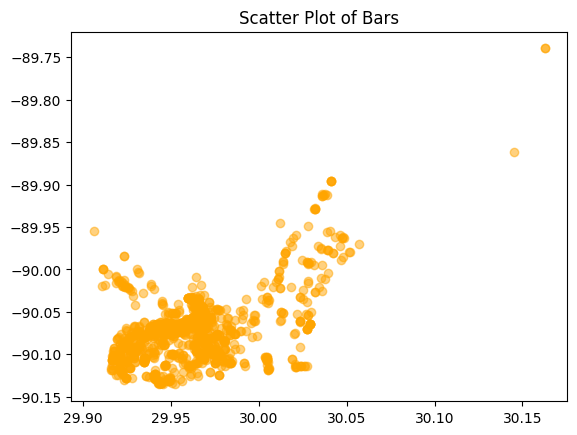

In [ ]:
bars_df = pd.read_csv('Alcohol_Beverage_Outlets_20240403.csv')
display(bars_df)
#outlier
bars_df = bars_df.drop(bars_df[bars_df['Lat'] > 30.8].index)
plt.scatter(bars_df['Lat'], bars_df['Lon'], color='orange', alpha=0.5)
plt.title('Scatter Plot of Bars')


Text(0.5, 1.0, 'Scatter Plot of Bars and Rental Properties')

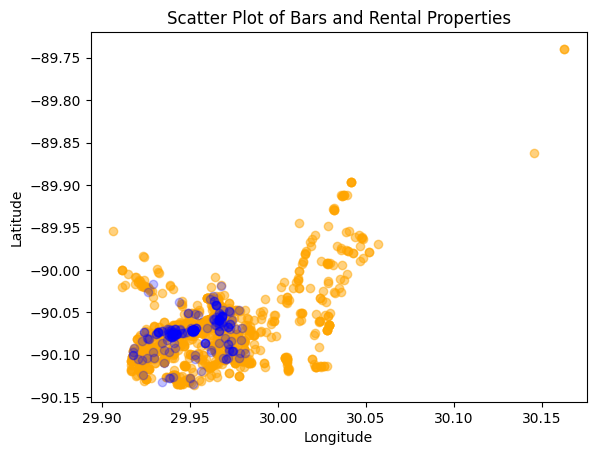

In [ ]:
import pylab
fig, ax = plt.subplots()
ax.scatter(bars_df['Lat'], bars_df['Lon'], color='orange', alpha=0.5)
ax.scatter(df_merge['Latitude'], df_merge['Longitude'],color='blue', alpha=0.25)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.title('Scatter Plot of Bars and Rental Properties')


In [ ]:
df_model = df_merge[["Address","Permit Type", "Latitude", "Longitude"]]
df_model["Bar Latitude"] = 0
df_model["Grocery Latitude"] = 0
df_model["Bar Longitude"] = 0
df_model["Grocery Longitude"] = 0
display(df_model)

<ipython-input-12-6f85af6fdb1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Latitude"] = 0
<ipython-input-12-6f85af6fdb1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Grocery Latitude"] = 0
<ipython-input-12-6f85af6fdb1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,Address,Permit Type,Latitude,Longitude,Bar Latitude,Grocery Latitude,Bar Longitude,Grocery Longitude
0,305 Lowerline St Apt A,Short Term Rental,29.933805,-90.131708,0,0,0,0
1,300 Baronne St Apt D,Short Term Rental Commercial Owner,29.952229,-90.072236,0,0,0,0
2,2425 Burgundy St,Short Term Rental,29.966833,-90.053567,0,0,0,0
3,3014 Amazon St,Short Term Rental,29.926084,-90.026246,0,0,0,0
4,1728 Clio St,Short Term Rental,29.942371,-90.075821,0,0,0,0
...,...,...,...,...,...,...,...,...
204,1345 Franklin Ave,Short Term Rental,29.971818,-90.049150,0,0,0,0
205,2322 Louisiana Ave,Short Term Rental,29.935087,-90.094976,0,0,0,0
206,341 Baronne St Apt A,Short Term Rental,29.951508,-90.072863,0,0,0,0
207,334 Carondelet St Unit 203,Short Term Rental,29.951006,-90.071306,0,0,0,0


In [ ]:
rlen = df_model.value_counts().sum()
val = 1/750
val2 = 1/480
print(val)
glen = grocery_df.value_counts().sum()
blen = bars_df.value_counts().sum()
for i in range(rlen):
  curL = df_model.Latitude.iloc[i]
  for j in range(blen):
    barval =  bars_df.Lat.iloc[j]
    if(barval < (curL)):
      if(barval >= (curL - val)):
        df_model["Bar Latitude"].iloc[i] = 1
    else:
      if (barval <= (curL + val)):
        df_model["Bar Latitude"].iloc[i] = 1
  for k in range(glen):
    gval =  grocery_df.Latitude.iloc[k]
    if(gval < (curL)):
      if(gval >= (curL - val2)):
        df_model["Grocery Latitude"].loc[i] = 1
    else:
      if (gval <= (curL + val2)):
        df_model["Grocery Latitude"].loc[i] = 1



<ipython-input-13-2a48e3299250>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Latitude"].iloc[i] = 1
<ipython-input-13-2a48e3299250>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Latitude"].iloc[i] = 1
<ipython-input-13-2a48e3299250>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Latitude"].iloc[i] = 1
<ipython-input-13-2a48e3299250>:24: SettingWithCopyWarning: 
A value is trying to 

0.0013333333333333333


Streaming output truncated to the last 5000 lines.
<ipython-input-13-2a48e3299250>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Latitude"].iloc[i] = 1
<ipython-input-13-2a48e3299250>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Latitude"].iloc[i] = 1
<ipython-input-13-2a48e3299250>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Latitude"].iloc[i] = 1
<ipython-input-13-2a48e3299250>

In [ ]:
rlen = df_model.value_counts().sum()
val = 1/750
print(val)
glen = grocery_df.value_counts().sum()
blen = bars_df.value_counts().sum()
for i in range(rlen):
  curL = df_model.Longitude.iloc[i]
  for j in range(blen):
    barval =  bars_df.Lon.iloc[j]
    if(barval < (curL)):
      if(barval >= (curL - val)):
        df_model["Bar Longitude"].iloc[i] = 1
    else:
      if (barval <= (curL + val)):
        df_model["Bar Longitude"].iloc[i] = 1
  for k in range(glen):
    gval =  grocery_df.Longitude.iloc[k]
    if(gval < (curL)):
      if(gval >= (curL - val)):
        df_model["Grocery Longitude"].loc[i] = 1
    else:
      if (gval <= (curL + val)):
        df_model["Grocery Longitude"].loc[i] = 1


0.0013333333333333333


Streaming output truncated to the last 5000 lines.
<ipython-input-14-44654db87a50>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Longitude"].iloc[i] = 1
<ipython-input-14-44654db87a50>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Longitude"].iloc[i] = 1
<ipython-input-14-44654db87a50>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Bar Longitude"].iloc[i] = 1
<ipython-input-14-44654db87a

In [ ]:

print(df_model["Bar Latitude"].value_counts())
print(df_model["Bar Longitude"].value_counts())
print(df_model["Grocery Longitude"].value_counts())
print(df_model["Grocery Latitude"].value_counts())

Bar Latitude
1    184
0     25
Name: count, dtype: int64
Bar Longitude
1    195
0     14
Name: count, dtype: int64
Grocery Longitude
0    105
1    104
Name: count, dtype: int64
Grocery Latitude
1    146
0     63
Name: count, dtype: int64


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')



In [ ]:
# %%shell

# jupyter nbconvert --to html '/content/drive/MyDrive/year 3/semester 2/Data Science/Data Science Project /Milestone 2 Data Science.ipynb'